# Diseño heurístico

In [1]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt

class respuesta_f:
    def __init__(self, w_max=1000):
        SR         = 5
        self.w_max = w_max
        self.w     = np.arange(1, SR*w_max)/SR
    #
    def set_Hs(self, Y, X):
        self.Hs = Y/X
    #
    @staticmethod
    def plot_mag(H, w, color='orange'):
        M_dB = 20*np.log10(np.abs(H))
        #
        plt.figure('Magnitud [dB]', figsize=(12, 6))
        plt.semilogx(w, M_dB, color, linewidth=3)
        plt.grid(True)
        #plt.show()
        
    @staticmethod
    def plot_phase(H, w, color='blue'):
        angle = np.angle(H, deg=True)
        #
        plt.figure('Fase [°]', figsize=(12, 7))
        plt.semilogx(w, angle, color, linewidth=3)
        plt.grid(True)
        #plt.show()

In [3]:
w_max = 350_000
@widgets.interact(wc1=(1, 400), wc2=(1, 400))
def magnitud(wc1=1, wc2=5):
    h1 = respuesta_f(w_max)
    #
    s  = 1j*h1.w
    Ys = wc1*wc2
    Xs = (s - wc1)*(s - wc2)
    h1.set_Hs(Ys, Xs)
    respuesta_f.plot_mag(h1.Hs, h1.w)

interactive(children=(IntSlider(value=1, description='wc1', max=400, min=1), IntSlider(value=5, description='w…

Sean $x_0=A_0e^{j\theta}$ y $x_0^*=A_0e^{-j\theta}$.

$$\left(s-A_0e^{j\theta}\right)\left(s-A_0e^{-j\theta}\right)=s^2-2A_0cos(\theta)s+A_0^2$$
donde $$A_0^2 = \sigma^2+\omega^2$$

$$H(s) = \dfrac{\omega_c^2}{s^2 + 2\omega_c cos(\theta)s + \omega_c^2}$$

$$\theta\in(\dfrac{\pi}{2}, \pi)$$

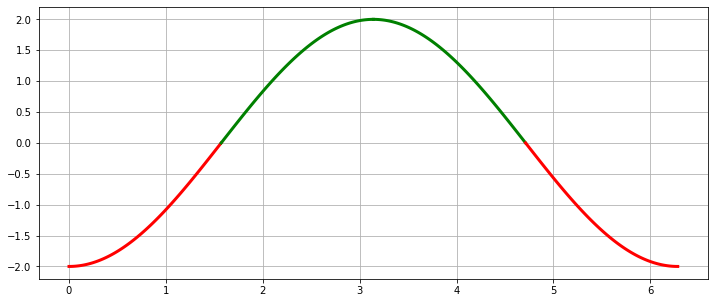

In [4]:
tt = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]

segm = list(
         map(lambda x, n=100: np.linspace(x[0], x[1], n),
             zip(tt[:-1], tt[1:]))
           )
#
for s in segm:
    dg = -2*np.cos(s)
    plt.figure("Intervalos \theta", figsize=(12, 5))
    if sum(dg)<0:
        plt.plot(s, dg, color='red', linewidth=3)
    else:
        plt.plot(s, dg, color='green', linewidth=3)
    #
    plt.grid(True)


In [5]:
w_max = 350_000
@widgets.interact(wc=(1, 100), theta=(np.pi/2+0.01, np.pi-0.01))
def magnitud(wc=1, theta=0.5):
    h1 = respuesta_f(w_max)
    #
    s  = 1j*h1.w
    Ys = wc**2
    Xs = s**2 - 2*wc*np.cos(theta)*s + wc**2
    h1.set_Hs(Ys, Xs)
    respuesta_f.plot_mag(h1.Hs, h1.w)

interactive(children=(IntSlider(value=1, description='wc', min=1), FloatSlider(value=1.5807963267948966, descr…

In [7]:
w_max = 5000
@widgets.interact(wc=(200, 500),
                  theta_1=(np.pi/2+0.01, np.pi-0.01),
                  theta_2=(np.pi/2+0.01, np.pi-0.01))
def magnitud(wc=1, theta_1=1.7, theta_2=2, cascade=False):
    h1 = respuesta_f(w_max)
    h2 = respuesta_f(w_max)
    #
    s  = 1j*h1.w
    Ys = wc**2
    Xs = s**2 - 2*wc*np.cos(theta_1)*s + wc**2
    h1.set_Hs(Ys, Xs)
    #
    Xs = s**2 - 2*wc*np.cos(theta_2)*s + wc**2
    h2.set_Hs(Ys, Xs)
    respuesta_f.plot_mag(h1.Hs, h1.w)
    respuesta_f.plot_mag(h2.Hs, h2.w, color='blue')
    if cascade:
        respuesta_f.plot_mag(h1.Hs*h2.Hs, h2.w, color='red')

interactive(children=(IntSlider(value=200, description='wc', max=500, min=200), FloatSlider(value=1.7, descrip…

In [48]:
theta_1 = 1.88
theta_2 = 2.
#
print(f"θ_0 = {-2*np.cos(theta_1):6.4f}")
print(f"θ_1 = {-2*np.cos(theta_2):6.4f}")

θ_0 = 1.4475
θ_1 = 0.8323


In [51]:
theta_1 = 2.38
theta_2 = 2.88
#
print(f"θ_0 = {-2*np.cos(theta_1):6.4f}")
print(f"θ_1 = {-2*np.cos(theta_2):6.4f}")

θ_0 = 1.4475
θ_1 = 1.9320
